In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Build Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.04 MiB | 23.97 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!make

In [ ]:
!chmod +x ./darknet

## Train

In [ ]:
!./darknet detector train /content/drive/MyDrive/yolov4_colab/obj.data /content/drive/MyDrive/yolov4_colab/yolov4-tiny.cfg /content/drive/MyDrive/yolov4_colab/yolov4-tiny.conv.29 -dont_show -map

## Detect in Images

In [ ]:
!./darknet detector test /content/drive/MyDrive/yolov4_colab/obj.data /content/drive/MyDrive/yolov4_colab/yolov4-tiny_test.cfg /content/drive/MyDrive/yolov4_colab/yolov4-tiny_best.weights /content/drive/MyDrive/yolov4_colab/images/ak47_020.jpg -thresh 0.5

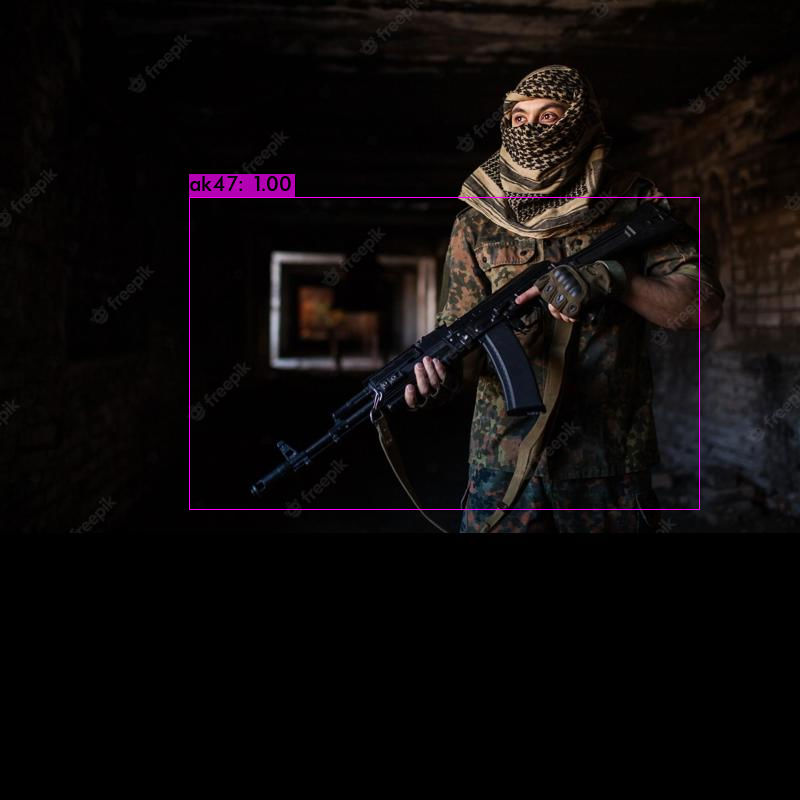

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

cv2_imshow(cv2.imread("predictions.jpg"))

## Detect in Videos

In [ ]:
!./darknet detector demo /content/drive/MyDrive/yolov4_colab/obj.data /content/drive/MyDrive/yolov4_colab/yolov4-tiny_test.cfg /content/drive/MyDrive/yolov4_colab/yolov4-tiny_best.weights -dont_show /content/toy_gun.mp4 -i 0 -out_filename results.avi -thresh 0.5 -ext_output